# Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

----

Let's load the libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl # colors
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import datetime as dt
import pickle

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.xmargin'] = 0.02
plt.rcParams['axes.ymargin'] = 0.1
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True

plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

Let's read in the data and show some basic characteristics:

In [2]:
lgs = pd.read_json("data/logins.json")

In [3]:
lgs.shape

(93142, 1)

In [4]:
lgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
lgs.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [6]:
print(lgs.min()[0])
print(lgs.max()[0])

1970-01-01 20:12:16
1970-04-13 18:57:38


A dataframe with just one column, the datetime format, no missing values, the data span the period of 3 and half months.

Let's set the index to the dates and add a column with the values of 1, to convert to a histogram. This way it will be easier to do aggregated counts.

In [7]:
lgs = lgs.set_index('login_time')

In [8]:
lgs['n'] = 1

In [9]:
lgs.head()

,n
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


Let's aggreate in the 15 min time intervals:

In [10]:
lgs15 = lgs.resample('15T').sum()
lgs15.head()

,n
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


and finally let's plot the data:

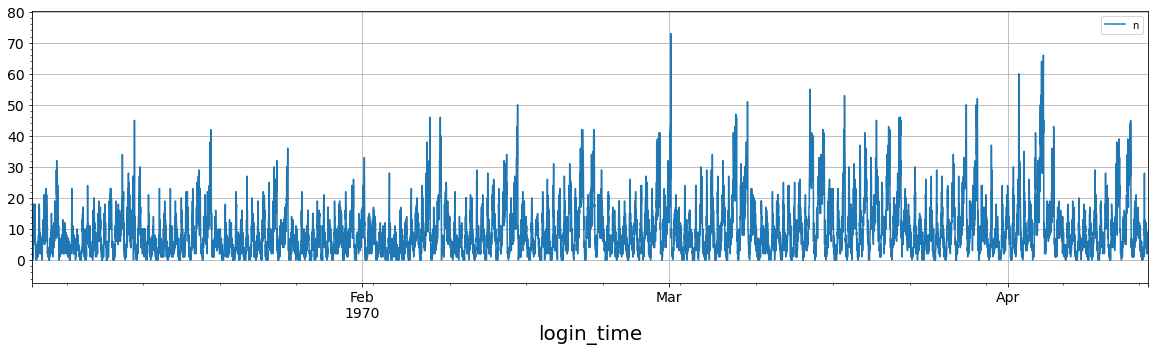

In [11]:
lgs15.plot();

The binning is still too fine. To get rid of fluctuations, let's plot the average number of logins with the rolling window of 1 day:

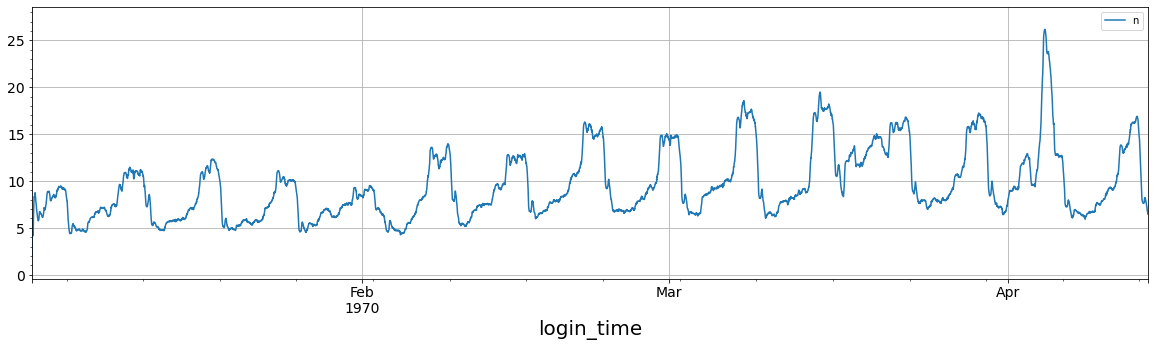

In [12]:
lgs15.rolling('1d').mean().plot();

Better now. We can clearly see a sesonality on top of a slowly rising trend, which levels off for April. There are at least 3 deviations from a clear seasonal oscilation pattern: at the end January, mid March and in the begining of April. The first two show a larger oscilation period, while the last one can be characterized as an enhanced narrow maximum.

Let's inspect the data in terms of periodic time variables such as the month, the day and the week of the month, the day of the week, and the hour of the day. Leat's plot the average number of logins in bins of those variables:

In [13]:
lgs15['month']        = lgs15.index.month
lgs15['day of month'] = lgs15.index.day
lgs15['week of month']= np.ceil(lgs15.index.day/7).astype('int')
lgs15['day of week']  = lgs15.index.weekday.astype('str') + '-' + lgs15.index.day_name()
lgs15['hour of day']  = lgs15.index.hour

lgs15.head()

,n,month,day of month,week of month,day of week,hour of day
login_time,,,,,,
1970-01-01 20:00:00,2,1,1,1,3-Thursday,20
1970-01-01 20:15:00,6,1,1,1,3-Thursday,20
1970-01-01 20:30:00,9,1,1,1,3-Thursday,20
1970-01-01 20:45:00,7,1,1,1,3-Thursday,20
1970-01-01 21:00:00,1,1,1,1,3-Thursday,21


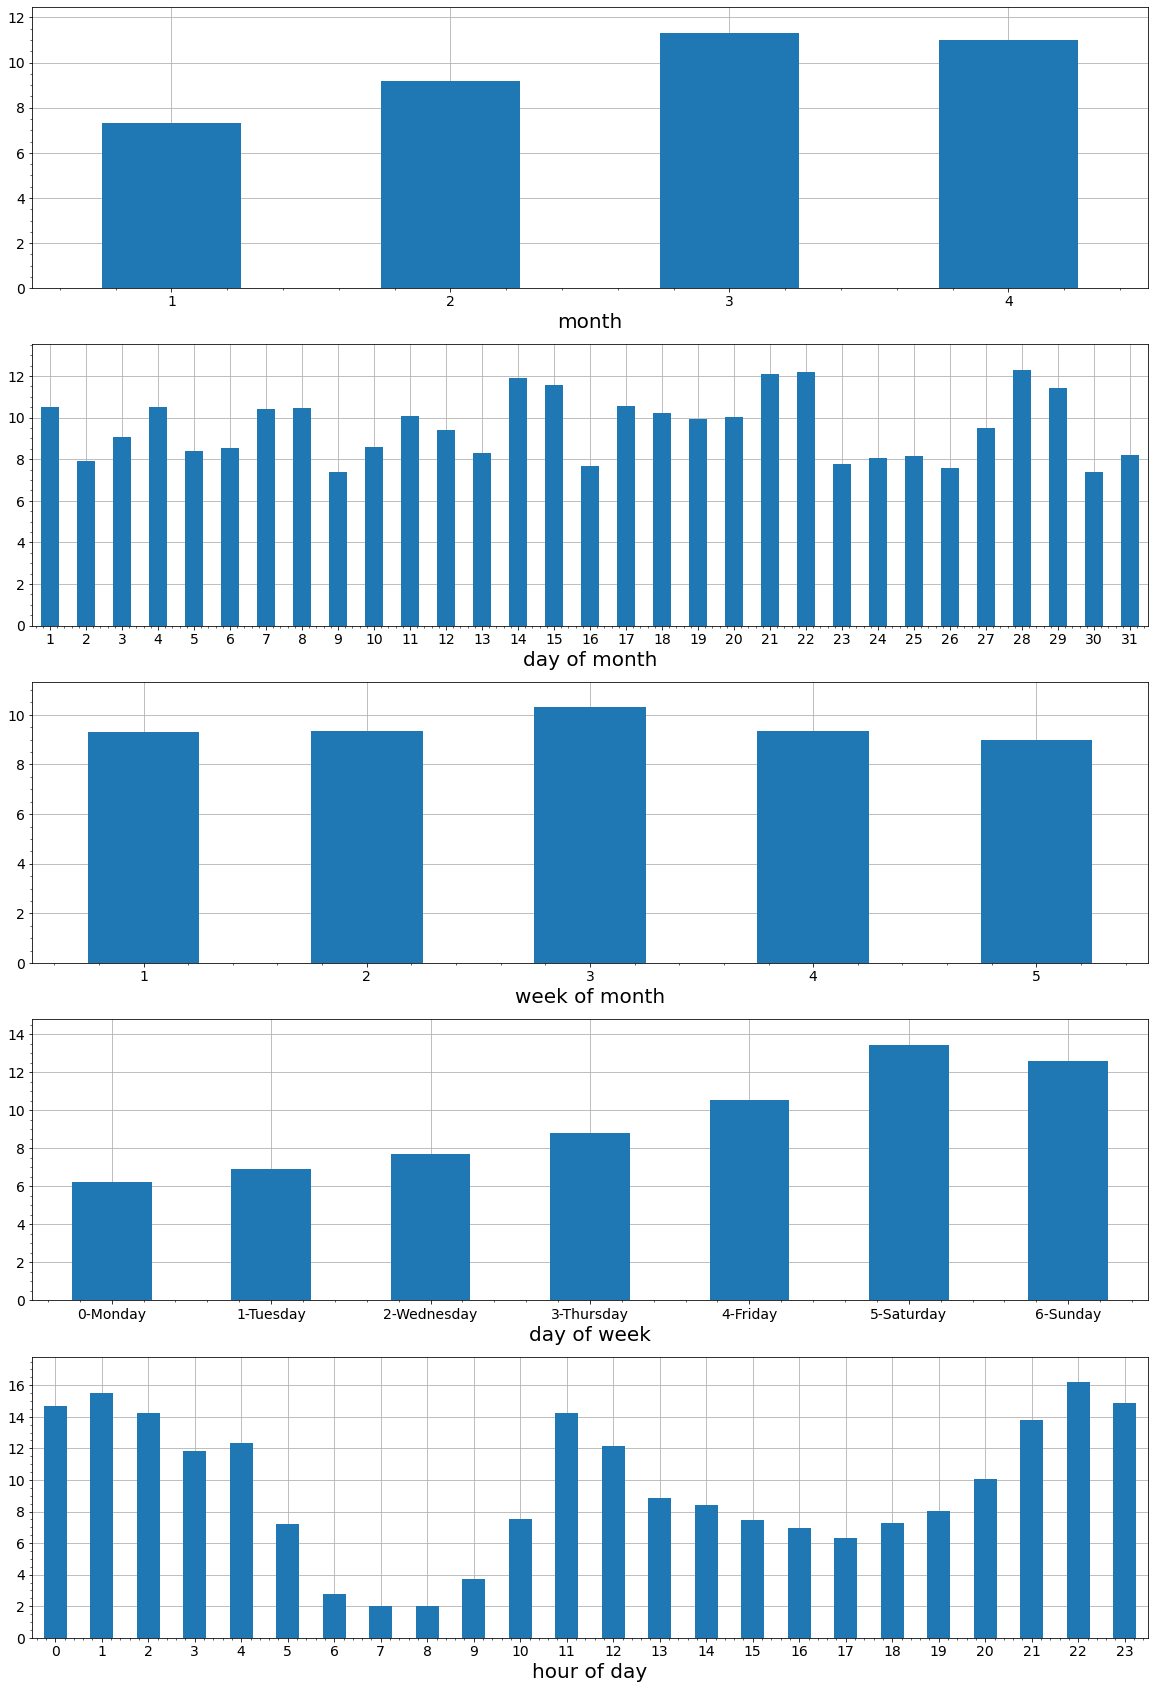

In [14]:
nplots = len(lgs15.columns[1:])
fig, ax = plt.subplots(nplots,1,figsize=(20,nplots*6))

for i,var in enumerate(lgs15.columns[1:]):
    
    lgs15.groupby(var)['n'].mean().plot.bar(ax=ax[i])    

    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation='horizontal');

A rising trend from January through March can be clearly seen now. The average number of logins per day within a month fluctuates too much to draw any conclusions, but it's clear that most logins happen in the middle of the month, i.e. in its third week. The average number of logins increases during the week, it is the smallest on Mondays and the largest on Saturdays and Sundays. The most popular hours during the day are 11-12 AM and 9 PM - 4 AM. It does not seem that there are any issues with the data quality.